# Ramesh-Current-Science

#### *Program to generate plots for Ramesh's Special Issue*

----
Written by: Kaustubh Thirumalai, Brown University ([Github](https://github.com/holy-kau))  
Written on: February 16, 2019
Update on: 

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import scipy.io as spio
import seaborn as sns
import pandas as pd
import xarray as xr
import numpy as np
import sys

## Load Datasets

In [2]:
#---- Load Salinity ----#  
sds = xr.open_dataset('/Users/kaustubh/Documents/Python/Datasets/ORAS4_SSS.nc')

#---- Load Temperature ----#  
tds = xr.open_dataset('/Users/kaustubh/Documents/Python/Datasets/HadISST_sst.nc')

### Clean up data

In [3]:
S = np.squeeze(sds.get('SO'))
S = S.rename({'TIME': 'time'})

# Arranging HadISST to same date-range as salinity data 
# NOTE: we have to add two days to the end here because salinity time index is on the 15th whereas HadISST is the 16th
# tds = tds.drop('time_bnds')
T = tds.get('sst').where((tds.sst != -1000.))
T = T.loc[dict(time=slice(S.time[0],S.time[-1]+np.timedelta64(2,'D')))]

In [4]:
S

<xarray.DataArray 'SO' (time: 672, LAT: 180, LONN179_180: 360)>
[43545600 values with dtype=float32]
Coordinates:
  * LONN179_180  (LONN179_180) float64 -179.5 -178.5 -177.5 ... 178.5 179.5
  * LAT          (LAT) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    LEV1_1       float64 5.022
  * time         (time) datetime64[ns] 1958-01-15 1958-02-15 ... 2013-12-15
Attributes:
    long_name:  salinity
    history:    From so

## Mean Annual Salinity Plot

In [5]:
#---- Mean Annual SSS ----#
annual_mean_sss = np.squeeze(np.mean(S,axis=0))

#---- Seasonality of SSS ----#
clima_S = S.groupby('time.month').mean('time')
seasonality_S = clima_S.max(dim='month') - clima_S.min(dim='month')

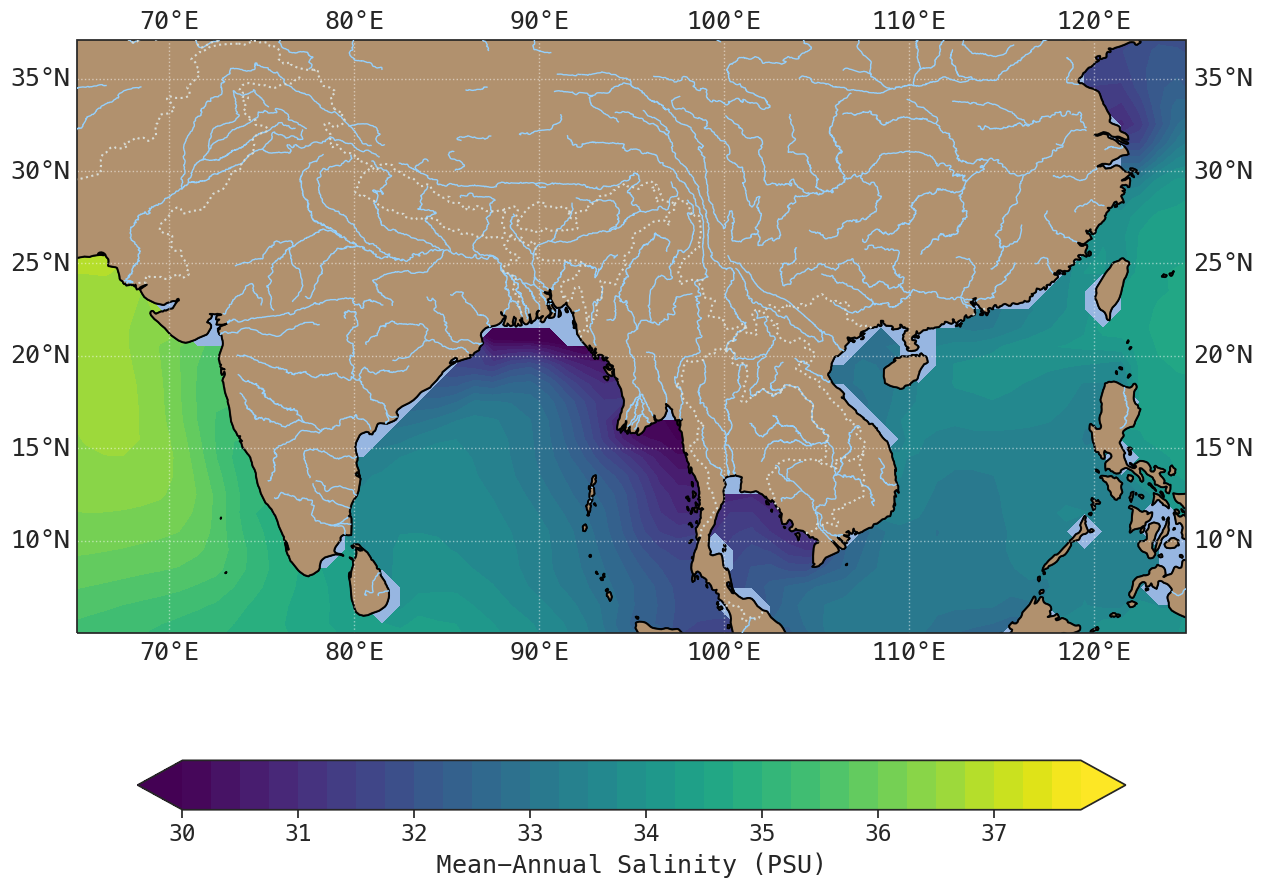

In [6]:
from matplotlib import gridspec
sns.set(style='white',palette='muted',font='Menlo',font_scale=1.5)
fig = plt.figure(constrained_layout=False,figsize=(15,11))
spec2 = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)

#------------------------------------#
#---- Figure 1a: SSS & Rainfall -----#
#------------------------------------#

#---- Projection ----#

ax1 = fig.add_subplot(spec2[0,0], projection=ccrs.PlateCarree())
ax1.set_extent([65,125,5,33.5])

#---- Colormap ----#
cmap1 = mpl.colors.LinearSegmentedColormap.from_list("", ["xkcd:dark blue","xkcd:deep blue","xkcd:cobalt blue","xkcd:dark sky blue","xkcd:dusty blue",'xkcd:bluegreen','xkcd:teal'],N=64)
# cmap1.set_bad(color='grey')

#---- Plot ----#
# im1 = ax1.pcolormesh(sds.LONN179_180,sds.LAT,annual_mean_sss,transform=ccrs.PlateCarree(),cmap=cmap1) #np.arange(29,38,0.5),
# im1 = ax1.pcolormesh(sds.LONN179_180,sds.LAT,annual_mean_sss,transform=ccrs.PlateCarree(),cmap=cmap1) #np.arange(29,38,0.5),
# im1.set_clim(31.5,37.5)
im = ax1.contourf(sds.LONN179_180,sds.LAT,annual_mean_sss,np.arange(30,38,0.25),extend='both',transform=ccrs.PlateCarree(),cmap='viridis') #np.arange(29,38,0.5),

#---- Colorbar ----#
cbar1 = plt.colorbar(im,extend='both',orientation='horizontal',shrink=.85)
cbar1.set_label('Mean-Annual Salinity (PSU)')

#---- Rivers ----#
from cartopy.io.shapereader import Reader
from cartopy import feature as cfeature
fname2 = '/Users/kaustubh/Documents/Python/Datasets/Maps/ne_10m_rivers_lake_centerlines/ne_10m_rivers_lake_centerlines.shp'
ax1.add_geometries(Reader(fname2).geometries(),
                  ccrs.PlateCarree(),linestyle='-',linewidth=1,facecolor='None',edgecolor='xkcd:light blue',zorder=4)

#---- Land & Boundaries ----#
fname = '/Users/kaustubh/Documents/Python/Datasets/Maps/ne_50m_land/ne_50m_land.shp'
ax1.add_geometries(Reader(fname).geometries(),
                  ccrs.PlateCarree(),
                  edgecolor='xkcd:black',facecolor='xkcd:black',zorder=1)
ax1.add_feature(cfeature.BORDERS,linestyle=':',linewidth=1.5,edgecolor='xkcd:light grey',zorder=4)

#---- Gridlines ----#
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl1 = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1, color='xkcd:white', alpha=0.5, linestyle=':')
gl1.xformatter = LONGITUDE_FORMATTER
gl1.yformatter = LATITUDE_FORMATTER
ax1.add_geometries(Reader(fname).geometries(),
                  ccrs.PlateCarree(),
                  edgecolor='xkcd:black',facecolor='xkcd:pale brown',zorder=1)
ax1.add_feature(cfeature.OCEAN)
ax1.add_feature(cfeature.COASTLINE,linewidth=1.5,alpha=0.78)

plt.show()

# # #---- Save figure ----#
# mpl.rcParams['pdf.fonttype'] = 42
# fig.savefig('Mean-Annual-Salinity.pdf')

/Users/kaustubh/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:318: UserWarning: The colormap's 'bad' has been set, but in order to wrap pcolormesh across the map it must be fully transparent.
  return func(self, *args, **kwargs)
/Users/kaustubh/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/kaustubh/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/kaustubh/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:318: UserWarning: The colormap's 'bad' has been set, but in order to wrap pcolormesh across the map it must be fully transparent.
  retur

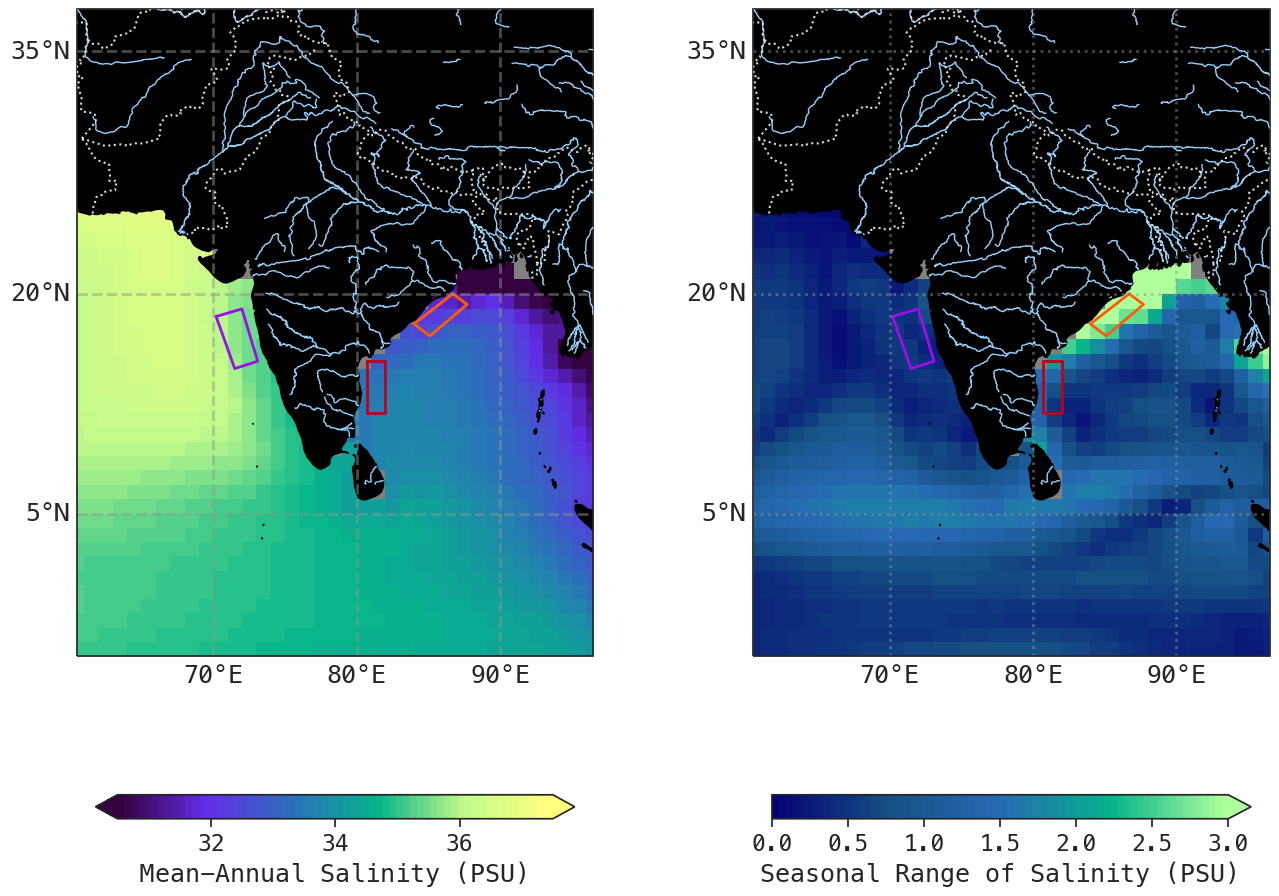

feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


In [7]:
sns.set(style='white',palette='muted',font='Menlo',font_scale=1.5)
fig = plt.figure(figsize=(16, 12))

#---- Projection ----#
# ax1 = plt.axes(projection=ccrs.Mercator())
ax1 = plt.subplot(1, 2, 1, projection=ccrs.Mercator())
ax1.set_extent([60.5, 96.5, -5, 36])

#---- Colormap ----#
cmap1 = mpl.colors.LinearSegmentedColormap.from_list("", ["xkcd:deep purple","xkcd:purple blue","xkcd:medium blue","xkcd:green blue","xkcd:pistachio",'xkcd:banana'],N=64)
cmap1.set_bad(color='grey')

#---- Plot ----#
im1 = ax1.pcolormesh(sds.LONN179_180,sds.LAT,annual_mean_sss,transform=ccrs.PlateCarree(),cmap=cmap1) #np.arange(29,38,0.5),
im1.set_clim(30.5,37.5)
# im = ax.contourf(sds.LONN179_180,sds.LAT,annual_mean_sss,np.arange(29,38,0.25),transform=ccrs.PlateCarree(),cmap=cmap) #np.arange(29,38,0.5),

#---- Regions of interest ----#
# NBOB
x1 = [86.7, 87.7, 85.1, 84, 86.7]
y1 = [20, 19.3, 17.2, 18, 20]
ax1.plot(x1, y1, transform=ccrs.PlateCarree(),color='xkcd:bright orange',linewidth=2)

# SBOB
x2 = [80.7, 82, 82, 80.7, 80.7]
y2 = [15.5, 15.5, 12, 12, 15.5]
ax1.plot(x2, y2, transform=ccrs.PlateCarree(),color='xkcd:scarlet',linewidth=2)

# NEAS
x3 = [70.2, 71.5, 73.1, 72, 70.2]
y3 = [18.5, 15, 15.5, 19, 18.5]
ax1.plot(x3, y3, transform=ccrs.PlateCarree(),color='xkcd:violet',linewidth=2)

#---- Colorbar ----#
cbar1 = plt.colorbar(im1,extend='both',orientation='horizontal',shrink=.85)
cbar1.set_label('Mean-Annual Salinity (PSU)')

#---- Rivers ----#
from cartopy.io.shapereader import Reader
from cartopy import feature as cfeature
fname2 = '/Users/kaustubh/Documents/Python/Datasets/Maps/ne_10m_rivers_lake_centerlines/ne_10m_rivers_lake_centerlines.shp'
ax1.add_geometries(Reader(fname2).geometries(),
                  ccrs.PlateCarree(),linestyle='-',linewidth=1,facecolor='None',edgecolor='xkcd:light blue',zorder=4)

#---- Land & Boundaries ----#
fname = '/Users/kaustubh/Documents/Python/Datasets/Maps/ne_50m_land/ne_50m_land.shp'
ax1.add_geometries(Reader(fname).geometries(),
                  ccrs.PlateCarree(),
                  edgecolor='xkcd:black',facecolor='xkcd:black',zorder=1)
ax1.add_feature(cfeature.BORDERS,linestyle=':',linewidth=1.5,edgecolor='xkcd:light grey',zorder=4)

#---- Gridlines ----#
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl1 = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='xkcd:gray', alpha=0.5, linestyle='--')
gl1.xlabels_top = False
gl1.ylabels_right = False
gl1.xlocator = mpl.ticker.FixedLocator(np.arange(60,120,10))
gl1.ylocator = mpl.ticker.FixedLocator(np.arange(-10,55,15))
gl1.xformatter = LONGITUDE_FORMATTER
gl1.yformatter = LATITUDE_FORMATTER

#======================= STANDARD DEVIATION MAP ============================

# [fZig,(axa,axa)] = plt.subplots(2,1,figsize=(10,16),subplot_kw={'projection': ccrs.PlateCarree()})
# 
#---- Projection ----#
# axa = plt.axes(projection=ccrs.Mercator())
ax2 = plt.subplot(1, 2, 2, projection=ccrs.Mercator())
ax2.set_extent([60.5, 96.5, -5, 36])

#---- Colormap ----#
cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ["xkcd:deep blue","xkcd:light navy","xkcd:mid blue","xkcd:green blue","xkcd:pastel green"],N=70)
cmap2.set_bad(color='grey')

#---- Plot ----#
im2 = ax2.pcolormesh(sds.LONN179_180,sds.LAT,seasonality_S,transform=ccrs.PlateCarree(),cmap=cmap2) #np.arange(0,4,0.1)
im2.set_clim(0,3)
# im = ax2.contourf(sds.LONN179_180,sds.LAT,annual_mean_sss,np.arange(29,38,0.25),transform=ccrs.PlateCarree(),cmap=cmap) #np.arange(29,38,0.5),

#---- Regions of interest ----#
# NBOB
ax2.plot(x1, y1, transform=ccrs.PlateCarree(),color='xkcd:bright orange',linewidth=2)

# SBOB
ax2.plot(x2, y2, transform=ccrs.PlateCarree(),color='xkcd:scarlet',linewidth=2)

# NEAS
ax2.plot(x3, y3, transform=ccrs.PlateCarree(),color='xkcd:violet',linewidth=2)


#---- Colorbar ----#
cbar2 = plt.colorbar(im2,extend='max',orientation='horizontal',shrink=.85)
cbar2.set_label('Seasonal Range of Salinity (PSU)')

#---- Rivers ----#
from cartopy.io.shapereader import Reader
from cartopy import feature as cfeature
fname2 = '/Users/kaustubh/Documents/Python/Datasets/Maps/ne_10m_rivers_lake_centerlines/ne_10m_rivers_lake_centerlines.shp'
ax2.add_geometries(Reader(fname2).geometries(),
                  ccrs.PlateCarree(),linestyle='-',linewidth=1,facecolor='None',edgecolor='xkcd:light blue',zorder=4)

#---- Land & Boundaries ----#
fname = '/Users/kaustubh/Documents/Python/Datasets/Maps/ne_50m_land/ne_50m_land.shp'
ax2.add_geometries(Reader(fname).geometries(),
                  ccrs.PlateCarree(),
                  edgecolor='xkcd:black',facecolor='xkcd:black',zorder=1)
ax2.add_feature(cfeature.BORDERS,linestyle=':',linewidth=1.5,edgecolor='xkcd:light grey',zorder=4)

#---- Gridlines ----#
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gla = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='xkcd:gray', alpha=0.5, linestyle=':')
gla.xlabels_top = False
gla.ylabels_right = False
gla.xlocator = mpl.ticker.FixedLocator(np.arange(60,120,10))
gla.ylocator = mpl.ticker.FixedLocator(np.arange(-10,55,15))
gla.xformatter = LONGITUDE_FORMATTER
gla.yformatter = LATITUDE_FORMATTER

plt.subplots_adjust(hspace=0.001)
plt.show()

# # #---- Save figure ----#
# mpl.rcParams['pdf.fonttype'] = 42
# fig.savefig('Mean-Annual-Salinity.pdf')

## Seasonal Plots

In [8]:
# seasonal_S = S.groupby('TIME.season').mean('TIME')
# seasonal_T = T.groupby('time.season').mean('time')

#---- Monthly Climatology ----#

clima_S = S.groupby('time.month').mean('time')
clima_T = T.groupby('time.month').mean('time')

/Users/kaustubh/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:318: UserWarning: The colormap's 'bad' has been set, but in order to wrap pcolormesh across the map it must be fully transparent.
  return func(self, *args, **kwargs)
/Users/kaustubh/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/kaustubh/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
/Users/kaustubh/opt/anaconda3/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:318: UserWarning: The colormap's 'bad' has been set, but in order to wrap pcolormesh across the map it must be fully transparent.
  retur

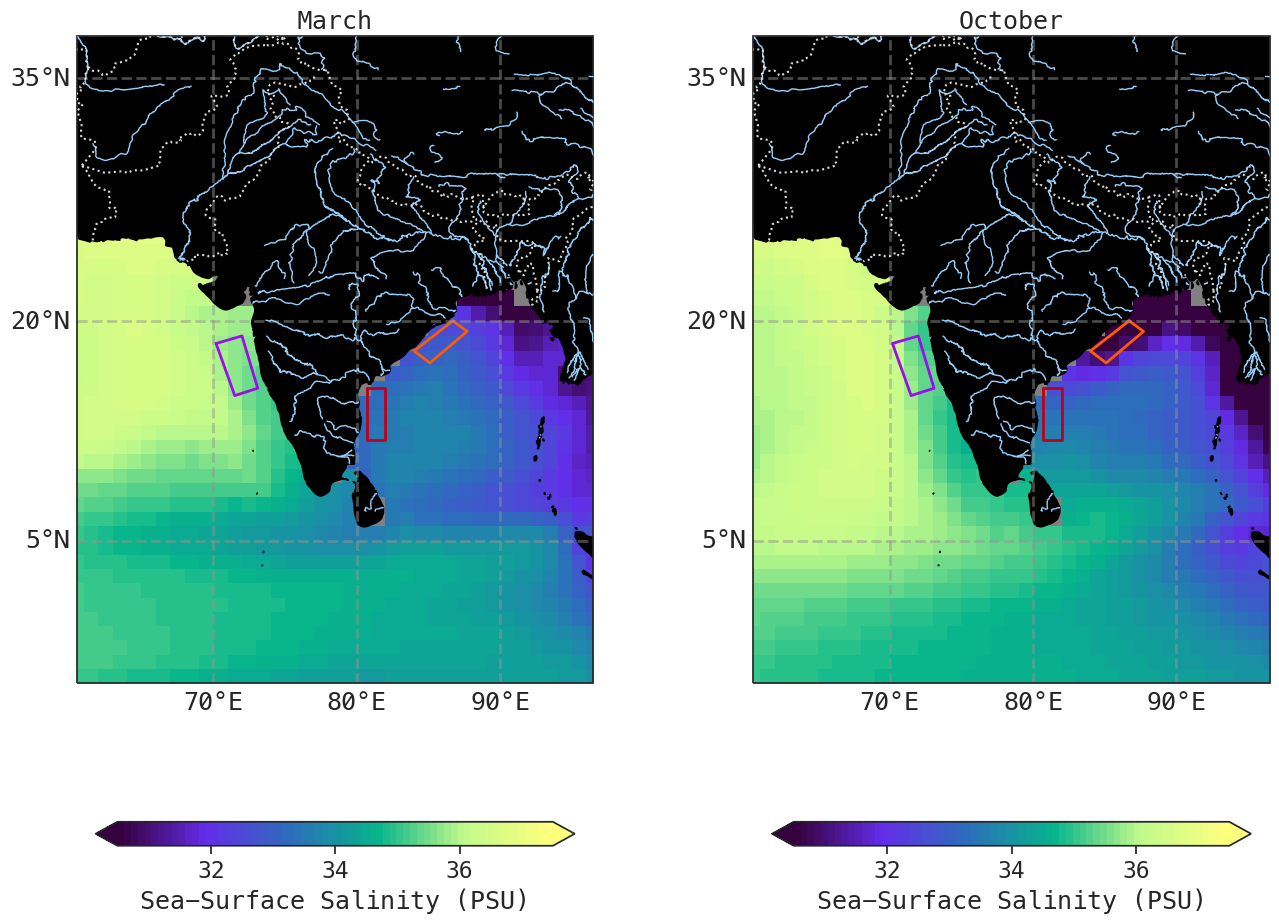

feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


In [ ]:
sns.set(style='white',palette='muted',font='Menlo',font_scale=1.5)
fig = plt.figure(figsize=(16, 12))

#======================= March MAP ============================

#---- Projection ----#
# ax1 = plt.axes(projection=ccrs.Mercator())
ax1 = plt.subplot(1, 2, 1, projection=ccrs.Mercator())
ax1.set_extent([60.5, 96.5, -5, 36])

#---- Colormap ----#
cmap1 = mpl.colors.LinearSegmentedColormap.from_list("", ["xkcd:deep purple","xkcd:purple blue","xkcd:medium blue","xkcd:green blue","xkcd:pistachio",'xkcd:banana'],N=64)
cmap1.set_bad(color='grey')

#---- Plot ----#
im1 = ax1.pcolormesh(sds.LONN179_180,sds.LAT,clima_S.sel(month=3),transform=ccrs.PlateCarree(),cmap=cmap1) #np.arange(29,38,0.5),
im1.set_clim(30.5,37.5)
# im = ax.contourf(sds.LONN179_180,sds.LAT,annual_mean_sss,np.arange(29,38,0.25),transform=ccrs.PlateCarree(),cmap=cmap) #np.arange(29,38,0.5),

#---- Regions of interest ----#
# NBOB
x1 = [86.7, 87.7, 85.1, 84, 86.7]
y1 = [20, 19.3, 17.2, 18, 20]
ax1.plot(x1, y1, transform=ccrs.PlateCarree(),color='xkcd:bright orange',linewidth=2)

# SBOB
x2 = [80.7, 82, 82, 80.7, 80.7]
y2 = [15.5, 15.5, 12, 12, 15.5]
ax1.plot(x2, y2, transform=ccrs.PlateCarree(),color='xkcd:scarlet',linewidth=2)

# NEAS
x3 = [70.2, 71.5, 73.1, 72, 70.2]
y3 = [18.5, 15, 15.5, 19, 18.5]
ax1.plot(x3, y3, transform=ccrs.PlateCarree(),color='xkcd:violet',linewidth=2)

#---- Colorbar ----#
cbar1 = plt.colorbar(im1,extend='both',orientation='horizontal',shrink=.85)
cbar1.set_label('Sea-Surface Salinity (PSU)')

#---- Rivers ----#
from cartopy.io.shapereader import Reader
from cartopy import feature as cfeature
fname2 = '/Users/kaustubh/Documents/Python/Datasets/Maps/ne_10m_rivers_lake_centerlines/ne_10m_rivers_lake_centerlines.shp'
ax1.add_geometries(Reader(fname2).geometries(),
                  ccrs.PlateCarree(),linestyle='-',linewidth=1,facecolor='None',edgecolor='xkcd:light blue',zorder=4)

#---- Land & Boundaries ----#
fname = '/Users/kaustubh/Documents/Python/Datasets/Maps/ne_50m_land/ne_50m_land.shp'
ax1.add_geometries(Reader(fname).geometries(),
                  ccrs.PlateCarree(),
                  edgecolor='xkcd:black',facecolor='xkcd:black',zorder=1)
ax1.add_feature(cfeature.BORDERS,linestyle=':',linewidth=1.5,edgecolor='xkcd:light grey',zorder=4)

#---- Gridlines ----#
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl1 = ax1.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='xkcd:gray', alpha=0.5, linestyle='--')
gl1.xlabels_top = False
gl1.ylabels_right = False
gl1.xlocator = mpl.ticker.FixedLocator(np.arange(60,120,10))
gl1.ylocator = mpl.ticker.FixedLocator(np.arange(-10,55,15))
gl1.xformatter = LONGITUDE_FORMATTER
gl1.yformatter = LATITUDE_FORMATTER
ax1.set_title('March')

#======================= OCTOBER MAP ============================

# [fZig,(axa,axa)] = plt.subplots(2,1,figsize=(10,16),subplot_kw={'projection': ccrs.PlateCarree()})
# 
#---- Projection ----#
# axa = plt.axes(projection=ccrs.Mercator())
ax2 = plt.subplot(1, 2, 2, projection=ccrs.Mercator())
ax2.set_extent([60.5, 96.5, -5, 36])

#---- Colormap ----#
cmap2 = mpl.colors.LinearSegmentedColormap.from_list("", ["xkcd:deep purple","xkcd:purple blue","xkcd:medium blue","xkcd:green blue","xkcd:pistachio",'xkcd:banana'],N=64)
cmap2.set_bad(color='grey')

#---- Plot ----#
im2 = ax2.pcolormesh(sds.LONN179_180,sds.LAT,clima_S.sel(month=10),transform=ccrs.PlateCarree(),cmap=cmap2) #np.arange(0,4,0.1)
im2.set_clim(30.5,37.5)
# im = ax2.contourf(sds.LONN179_180,sds.LAT,annual_mean_sss,np.arange(29,38,0.25),transform=ccrs.PlateCarree(),cmap=cmap) #np.arange(29,38,0.5),

#---- Regions of interest ----#
# NBOB
ax2.plot(x1, y1, transform=ccrs.PlateCarree(),color='xkcd:bright orange',linewidth=2)

# SBOB
ax2.plot(x2, y2, transform=ccrs.PlateCarree(),color='xkcd:scarlet',linewidth=2)

# NEAS
ax2.plot(x3, y3, transform=ccrs.PlateCarree(),color='xkcd:violet',linewidth=2)


#---- Colorbar ----#
cbar2 = plt.colorbar(im2,extend='both',orientation='horizontal',shrink=.85)
cbar2.set_label('Sea-Surface Salinity (PSU)')

#---- Rivers ----#
from cartopy.io.shapereader import Reader
from cartopy import feature as cfeature
fname2 = '/Users/kaustubh/Documents/Python/Datasets/Maps/ne_10m_rivers_lake_centerlines/ne_10m_rivers_lake_centerlines.shp'
ax2.add_geometries(Reader(fname2).geometries(),
                  ccrs.PlateCarree(),linestyle='-',linewidth=1,facecolor='None',edgecolor='xkcd:light blue',zorder=4)

#---- Land & Boundaries ----#
fname = '/Users/kaustubh/Documents/Python/Datasets/Maps/ne_50m_land/ne_50m_land.shp'
ax2.add_geometries(Reader(fname).geometries(),
                  ccrs.PlateCarree(),
                  edgecolor='xkcd:black',facecolor='xkcd:black',zorder=1)
ax2.add_feature(cfeature.BORDERS,linestyle=':',linewidth=1.5,edgecolor='xkcd:light grey',zorder=4)

#---- Gridlines ----#
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gla = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=2, color='xkcd:gray', alpha=0.5, linestyle='--')
gla.xlabels_top = False
gla.ylabels_right = False
gla.xlocator = mpl.ticker.FixedLocator(np.arange(60,120,10))
gla.ylocator = mpl.ticker.FixedLocator(np.arange(-10,55,15))
gla.xformatter = LONGITUDE_FORMATTER
gla.yformatter = LATITUDE_FORMATTER
ax2.set_title('October')

plt.subplots_adjust(hspace=0.001)
plt.show()

# # #---- Save figure ----#
# mpl.rcParams['pdf.fonttype'] = 42
# fig.savefig('Seasonal-Salinity.pdf')

## Regions of Interest

- To make this happen, we will first round off the plotted lat/lon values to their nearest point (with 0.5): 
    - '`np.floor(x4)+0.5)`'
- Then we use '`np.in1d`' (Test whether each element of a 1-D array is also present in a second array.) between the newly calculated lat/lon values and the data-array's lat/lon
    - An '`&`' conditional formatter is used to check the conditions for both latitude and longitude
    - Then we resample the returned values (via boolean) into a monthly-mean, averaging across the selected space


### Regions & Forward Model

In [10]:
#---- Region 1: Nothern Bay of Bengal ----#
S1 = S.where((S.LONN179_180==S.LONN179_180[np.in1d(S.LONN179_180, np.floor(x1)+0.5)]) 
                         & (S.LAT==S.LAT[np.in1d(S.LAT, np.floor(y1)+0.5)])).resample(time='1MS').mean(dim=S.dims)
T1 = T.where((T.longitude==T.longitude[np.in1d(T.longitude, np.floor(x1)+0.5)]) 
                         & (T.latitude==T.latitude[np.in1d(T.latitude, np.floor(y1)+0.5)])).resample(time='1MS').mean(dim=T.dims)
d18O1 =  (0.36*S1 - 12 -0.27) + ((16.5-T1)/4.8)


#---- Region 2: Southern Bay of Bengal ----#
S2 = S.where((S.LONN179_180==S.LONN179_180[np.in1d(S.LONN179_180, np.floor(x2)+0.5)]) 
                         & (S.LAT==S.LAT[np.in1d(S.LAT, np.floor(y2)+0.5)])).resample(time='1MS').mean(dim=S.dims)
T2 = T.where((T.longitude==T.longitude[np.in1d(T.longitude, np.floor(x2)+0.5)]) 
                         & (T.latitude==T.latitude[np.in1d(T.latitude, np.floor(y2)+0.5)])).resample(time='1MS').mean(dim=T.dims)
d18O2 =  (0.36*S2 - 12 -0.27) + ((16.5-T2)/4.8)

#---- Region 3: Northeastern Arabian Sea ----#
S3 = S.where((S.LONN179_180==S.LONN179_180[np.in1d(S.LONN179_180, np.floor(x3)+0.5)]) 
                         & (S.LAT==S.LAT[np.in1d(S.LAT, np.floor(y3)+0.5)])).resample(time='1MS').mean(dim=S.dims)
T3 = T.where((T.longitude==T.longitude[np.in1d(T.longitude, np.floor(x3)+0.5)]) 
                         & (T.latitude==T.latitude[np.in1d(T.latitude, np.floor(y3)+0.5)])).resample(time='1MS').mean(dim=T.dims)
d18O3 =  (0.26*S3 - 8.9 -0.27) + ((16.5-T3)/4.8)

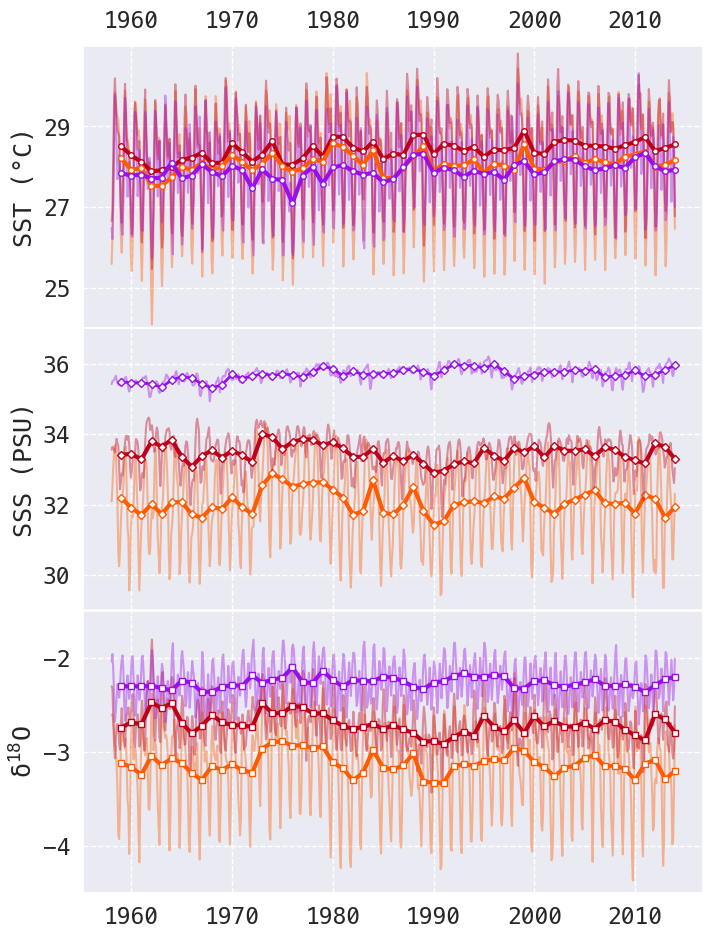

feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


In [ ]:
sns.set(style='darkgrid',palette='muted',font='Menlo',font_scale=1.5)
[fig,(ax1,ax2,ax3)] = plt.subplots(3,1,figsize=(8,11))

Y = pd.date_range(start='6/1/1958',end='7/1/2014', freq='1Y')
ms = 4

#---- Temperature ----#
ax1.plot(T.time,T1,color='xkcd:bright orange',alpha=0.4)
ax1.plot(T.time,T2,color='xkcd:scarlet',alpha=0.4)
ax1.plot(T.time,T3,color='xkcd:violet',alpha=0.4)

ax1.plot(Y,T2.resample(time='1Y').mean(),'-o',color='xkcd:scarlet',markerfacecolor='white',markersize=ms,linewidth=3)
ax1.plot(Y,T1.resample(time='1Y').mean(),'-o',color='xkcd:bright orange',markerfacecolor='white',markersize=ms,linewidth=3)
ax1.plot(Y,T3.resample(time='1Y').mean(),'-o',color='xkcd:violet',markerfacecolor='white',markersize=ms,linewidth=3)
ax1.set_ylabel('SST (°C)')

#---- Salinity ----#
ax2.plot(S.time,S1,color='xkcd:bright orange',alpha=0.4)
ax2.plot(Y,S1.resample(time='1Y').mean(),'-D',color='xkcd:bright orange',markerfacecolor='white',markersize=ms,linewidth=3)

ax2.plot(S.time,S2,color='xkcd:scarlet',alpha=0.4)
ax2.plot(Y,S2.resample(time='1Y').mean(),'-D',color='xkcd:scarlet',markerfacecolor='white',markersize=ms,linewidth=3)

ax2.plot(S.time,S3,color='xkcd:violet',alpha=0.4)
ax2.plot(Y,S3.resample(time='1Y').mean(),'-D',color='xkcd:violet',markerfacecolor='white',markersize=ms,linewidth=2)
ax2.set_ylabel('SSS (PSU)')

#---- Pseudo-δ¹⁸O ----#
ax3.plot(T.time,d18O1,color='xkcd:bright orange',alpha=0.4)
ax3.plot(T.time,d18O2,color='xkcd:scarlet',alpha=0.4)
ax3.plot(T.time,d18O3,color='xkcd:violet',alpha=0.4)

ax3.plot(Y,d18O2.resample(time='1Y').mean(),'-s',color='xkcd:scarlet',markerfacecolor='white',markersize=ms,linewidth=3)
ax3.plot(Y,d18O1.resample(time='1Y').mean(),'-s',color='xkcd:bright orange',markerfacecolor='white',markersize=ms,linewidth=3)
ax3.plot(Y,d18O3.resample(time='1Y').mean(),'-s',color='xkcd:violet',markerfacecolor='white',markersize=ms,linewidth=3)
ax3.set_ylabel('δ$\mathregular{^{18}}$O')

ax1.xaxis.set_label_position('top') 
ax1.tick_params(
    which='both',      # both major and minor ticks are affected
    labeltop=True,
    labelbottom=False) # labels along the bottom edge are off
ax1.grid(axis='x',linestyle='--')
ax1.grid(axis='y',linestyle='--')
ax1.set_yticks(np.arange(25,30,2))
ax1.set_ylim([24,31])

ax2.tick_params(
    which='both',      # both major and minor ticks are affected
    labeltop=False,
    labelbottom=False) # labels along the bottom edge are off
ax2.grid(axis='x',linestyle='--')
ax2.grid(axis='y',linestyle='--')
ax2.set_yticks(np.arange(30,37,2))
ax2.set_ylim([29,37])

ax3.grid(axis='x',linestyle='--')
ax3.grid(axis='y',linestyle='--')
ax3.set_ylim([-4.5,-1.5])
ax3.set_yticks(np.arange(-4,-1,1))

plt.subplots_adjust(hspace=0.001)
plt.show()


# #---- Save figure ----#
# mpl.rcParams['pdf.fonttype'] = 42
# fig.savefig('TS-Timeseries-1.pdf')

## Calculate Climatology

In [12]:
clima1 = d18O1.groupby('time.month').mean()
clima2 = d18O2.groupby('time.month').mean()
clima3 = d18O3.groupby('time.month').mean()

climaT1 = T1.groupby('time.month').mean()
climaT2 = T2.groupby('time.month').mean()
climaT3 = T3.groupby('time.month').mean()

climaS1 = S1.groupby('time.month').mean()
climaS2 = S2.groupby('time.month').mean()
climaS3 = S3.groupby('time.month').mean()

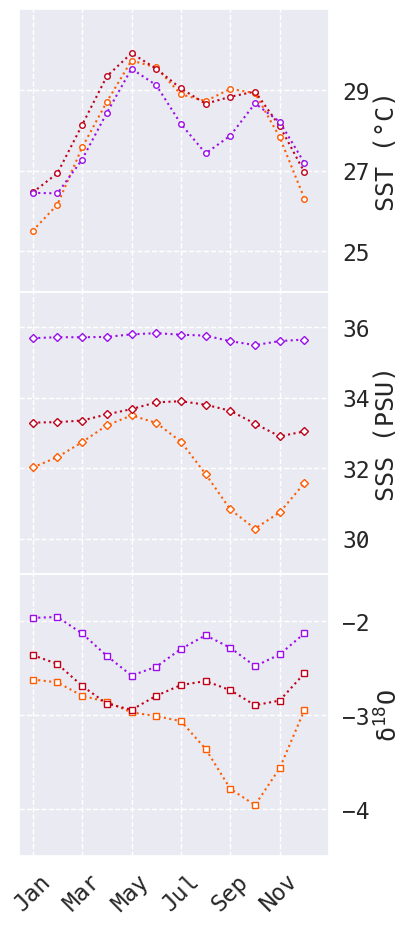

feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


In [ ]:
sns.set(style='darkgrid',palette='muted',font='Menlo',font_scale=1.5)
[fig,(ax1,ax2,ax3)] = plt.subplots(3,1,figsize=(4,11))

mons = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

Y = pd.date_range(start='6/1/1958',end='7/1/2014', freq='1Y')
ms = 4

#---- Temperature ----#
ax1.plot(mons,climaT1,':o',color='xkcd:bright orange',markersize=ms,markerfacecolor='w')
ax1.plot(mons,climaT2,':o',color='xkcd:scarlet',markersize=ms,markerfacecolor='w')
ax1.plot(mons,climaT3,':o',color='xkcd:violet',markersize=ms,markerfacecolor='w')
ax1.set_xticks(np.arange(0,13,2))
ax1.set_ylabel('SST (°C)')

#---- Salinity ----#
ax2.plot(mons,climaS1,':D',color='xkcd:bright orange',markersize=ms,markerfacecolor='w')
ax2.plot(mons,climaS2,':D',color='xkcd:scarlet',markersize=ms,markerfacecolor='w')
ax2.plot(mons,climaS3,':D',color='xkcd:violet',markersize=ms,markerfacecolor='w')
ax2.set_xticks(np.arange(0,13,2))
ax2.set_ylabel('SSS (PSU)')

#---- Pseudo-δ¹⁸O ----#
ax3.plot(mons,clima1,':s',color='xkcd:bright orange',markersize=ms,markerfacecolor='w')
ax3.plot(mons,clima2,':s',color='xkcd:scarlet',markersize=ms,markerfacecolor='w')
ax3.plot(mons,clima3,':s',color='xkcd:violet',markersize=ms,markerfacecolor='w')
ax3.set_xticks(np.arange(0,13,2))
ax3.set_ylabel('δ$\mathregular{^{18}}$O')

ax1.xaxis.set_label_position('top') 
ax1.yaxis.set_label_position('right') 
ax1.tick_params(
    which='both',      
    labelleft=False,
    labelright=True,
    labeltop=False,
    labelbottom=False) 
ax1.grid(axis='x',linestyle='--')
ax1.grid(axis='y',linestyle='--')
ax1.set_yticks(np.arange(25,30,2))
ax1.set_ylim([24,31])

ax2.yaxis.set_label_position('right') 
ax2.tick_params(
    which='both',     
    labelleft=False,
    labelright=True,
    labeltop=False,
    labelbottom=False) 
ax2.grid(axis='x',linestyle='--')
ax2.grid(axis='y',linestyle='--')
ax2.set_yticks(np.arange(30,37,2))
ax2.set_ylim([29,37])

ax3.yaxis.set_label_position('right') 
ax3.xaxis.set_label_position('bottom') 
ax3.tick_params(
    which='both',      
    labelleft=False,
    labelright=True,
    labeltop=False,
    labelbottom=True) 
ax3.grid(axis='x',linestyle='--')
ax3.grid(axis='y',linestyle='--')
ax3.set_ylim([-4.5,-1.5])
ax3.set_yticks(np.arange(-4,-1,1))
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45)

plt.subplots_adjust(hspace=0.001)
plt.show()

# #---- Save figure ----#
# mpl.rcParams['pdf.fonttype'] = 42
# fig.savefig('TS-Clima-1.pdf')

## QQ Plots & Rainfall Sensitivity

### Make varying climatology and re-add to anomalies

In [14]:
#=================== NBOB ==============================#

#---- Calculate increased and decreased seasonality ----#

climaSI1 = (climaS1 + (climaS1-climaS1.mean())*0.75)
climaSD1 = (climaS1 - (climaS1-climaS1.mean())*0.75)

S1_anom = S1.groupby('time.month') - climaS1
S1_D = S1_anom.groupby('time.month') + climaSD1
S1_I = S1_anom.groupby('time.month') + climaSI1

O1_SD = (0.36*S1_D - 12 -0.27) + ((16.5-T1)/4.8)
O1_SI = (0.36*S1_I - 12 -0.27) + ((16.5-T1)/4.8)

#---- Calculate increased and decreased temperature ----#

climaTI1 = (climaT1 + (climaT1-climaT1.mean())*0.75)
climaTD1 = (climaT1 - (climaT1-climaT1.mean())*0.75)

T1_anom = T1.groupby('time.month') - climaT1
T1_D = T1_anom.groupby('time.month') + climaTD1
T1_I = T1_anom.groupby('time.month') + climaTI1

O1_TD = (0.36*S1 - 12 -0.27) + ((16.5-T1_D)/4.8)
O1_TI = (0.36*S1 - 12 -0.27) + ((16.5-T1_I)/4.8)

#=================== SBOB ==============================#

#---- Calculate increased and decreased seasonality ----#

climaSI2 = (climaS2 + (climaS2-climaS2.mean())*0.75)
climaSD2 = (climaS2 - (climaS2-climaS2.mean())*0.75)

S2_anom = S2.groupby('time.month') - climaS2
S2_D = S2_anom.groupby('time.month') + climaSD2
S2_I = S2_anom.groupby('time.month') + climaSI2

O2_SD = (0.36*S2_D - 12 -0.27) + ((16.5-T2)/4.8)
O2_SI = (0.36*S2_I - 12 -0.27) + ((16.5-T2)/4.8)

#---- Calculate increased and decreased temperature ----#

climaTI2 = (climaT2 + (climaT2-climaT2.mean())*0.75)
climaTD2 = (climaT2 - (climaT2-climaT2.mean())*0.75)

T2_anom = T2.groupby('time.month') - climaT2
T2_D = T2_anom.groupby('time.month') + climaTD2
T2_I = T2_anom.groupby('time.month') + climaTI2

O2_TD = (0.36*S2 - 12 -0.27) + ((16.5-T2_D)/4.8)
O2_TI = (0.36*S2 - 12 -0.27) + ((16.5-T2_I)/4.8)

#=================== NEAS ==============================#

#---- Calculate increased and decreased seasonality ----#

climaSI3 = (climaS3 + (climaS3-climaS3.mean())*0.75)
climaSD3 = (climaS3 - (climaS3-climaS3.mean())*0.75)

S3_anom = S3.groupby('time.month') - climaS3
S3_D = S3_anom.groupby('time.month') + climaSD3
S3_I = S3_anom.groupby('time.month') + climaSI3

O3_SD = (0.23*S3_D - 8.9 -0.27) + ((16.5-T3)/4.8)
O3_SI = (0.26*S3_I - 8.9 -0.27) + ((16.5-T3)/4.8)

#---- Calculate increased and decreased temperature ----#

climaTI3 = (climaT3 + (climaT3-climaT3.mean())*0.75)
climaTD3 = (climaT3 - (climaT3-climaT3.mean())*0.75)

T3_anom = T3.groupby('time.month') - climaT3
T3_D = T3_anom.groupby('time.month') + climaTD3
T3_I = T3_anom.groupby('time.month') + climaTI3

O3_TD = (0.26*S3 - 8.9 -0.27) + ((16.5-T3_D)/4.8)
O3_TI = (0.26*S3 - 8.9 -0.27) + ((16.5-T3_I)/4.8)

### Calculate Quantiles

In [15]:
# Number of Quantiles
NQ = np.linspace(0,0.95,30)

Q1 = np.quantile(d18O1.values,NQ)
Q2 = np.quantile(d18O2.values,NQ)
Q3 = np.quantile(d18O3.values,NQ)

Q1SD = np.quantile(O1_SD.values,NQ)
Q1SI = np.quantile(O1_SI.values,NQ)

Q1TD = np.quantile(O1_TD.values,NQ)
Q1TI = np.quantile(O1_TI.values,NQ)

Q2SD = np.quantile(O2_SD.values,NQ)
Q2SI = np.quantile(O2_SI.values,NQ)

Q2TD = np.quantile(O2_TD.values,NQ)
Q2TI = np.quantile(O2_TI.values,NQ)

Q3SD = np.quantile(O3_SD.values,NQ)
Q3SI = np.quantile(O3_SI.values,NQ)

Q3TD = np.quantile(O3_TD.values,NQ)
Q3TI = np.quantile(O3_TI.values,NQ)

### Make the Q-Q Plot

findfont: Font family 'SF Compact Display' not found.
findfont: Font family 'SF Compact Display' not found.
findfont: Font family 'SF Compact Display' not found.
findfont: Font family 'SF Compact Display' not found.
findfont: Font family 'SF Compact Display' not found.
findfont: Font family 'SF Compact Display' not found.
findfont: Font family 'SF Compact Display' not found.
findfont: Font family 'SF Compact Display' not found.
findfont: Font family 'SF Compact Display' not found.
findfont: Font family 'SF Compact Display' not found.
findfont: Font family 'SF Compact Display' not found.
findfont: Font family 'SF Compact Display' not found.
findfont: Font family 'SF Compact Display' not found.
findfont: Font family 'SF Compact Display' not found.
findfont: Font family 'SF Compact Display' not found.
findfont: Font family 'SF Compact Display' not found.
findfont: Font family 'SF Compact Display' not found.
findfont: Font family 'SF Compact Display' not found.
findfont: Font family 'SF Co

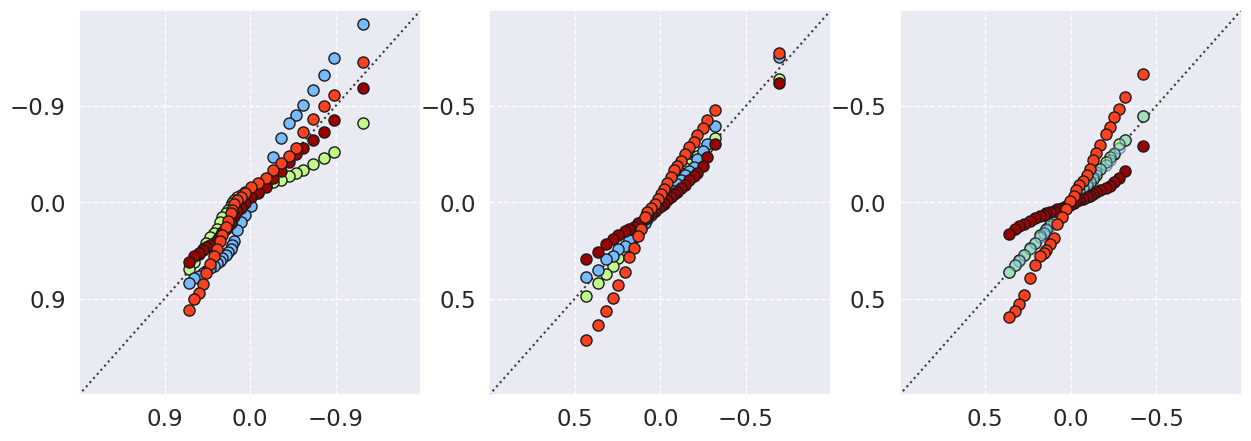

In [ ]:
from scipy.stats import linregress 

# reg = linregress(x,y)

sns.set(style='darkgrid',palette='muted',font='Menlo',font_scale=1.5)
[fig,(ax1,ax2,ax3)] = plt.subplots(1,3,figsize=(15,5))

ax1.plot(np.arange(-1.8,1.9,0.2),np.arange(-1.8,1.9,0.2),':',color='xkcd:dark grey')
ax1.plot(Q1-np.mean(Q1),Q1SD-np.mean(Q1SD),'o',color='xkcd:pistachio',markeredgecolor='k',label='Reduced Salinity',markersize=8)
ax1.plot(Q1-np.mean(Q1),Q1SI-np.mean(Q1SI),'o',color='xkcd:sky blue',markeredgecolor='k',label='Increased Salinity',markersize=8)
ax1.plot(Q1-np.mean(Q1),Q1TD-np.mean(Q1TD),'o',color='xkcd:deep red',markeredgecolor='k',label='Reduced Temperature',markersize=8)
ax1.plot(Q1-np.mean(Q1),Q1TI-np.mean(Q1TI),'o',color='xkcd:orange red',markeredgecolor='k',label='Increased Temperature',markersize=8)
ax1.set_ylim([-1.8,1.8])
ax1.set_xlim([-1.8,1.8])
ax1.set_yticks(np.arange(-0.9,1,0.9))
ax1.set_xticks(np.arange(-0.9,1,0.9))
ax1.grid(axis='both',linestyle='--')
ax1.invert_yaxis()
ax1.invert_xaxis()
# ax1.legend()

ax2.plot(np.arange(-1,1.1,0.1),np.arange(-1,1.1,0.1),':',color='xkcd:dark grey')
ax2.plot(Q2-np.mean(Q2),Q2SD-np.mean(Q2SD),'o',color='xkcd:pistachio',markeredgecolor='k',label='Reduced Salinity',markersize=8)
ax2.plot(Q2-np.mean(Q2),Q2SI-np.mean(Q2SI),'o',color='xkcd:sky blue',markeredgecolor='k',label='Increased Salinity',markersize=8)
ax2.plot(Q2-np.mean(Q2),Q2TD-np.mean(Q2TD),'o',color='xkcd:deep red',markeredgecolor='k',label='Reduced Temperature',markersize=8)
ax2.plot(Q2-np.mean(Q2),Q2TI-np.mean(Q2TI),'o',color='xkcd:orange red',markeredgecolor='k',label='Increased Temperature',markersize=8)
ax2.set_ylim([-1,1])
ax2.set_xlim([-1,1])
ax2.set_yticks(np.arange(-0.5,0.9,0.5))
ax2.set_xticks(np.arange(-0.5,0.9,0.5))
ax2.grid(axis='both',linestyle='--')
ax2.invert_yaxis()
ax2.invert_xaxis()

ax3.plot(np.arange(-1,1.1,0.1),np.arange(-1,1.1,0.1),':',color='xkcd:dark grey')
ax3.plot(Q3-np.mean(Q3),Q3SD-np.mean(Q3SD),'o',color='xkcd:pistachio',markeredgecolor='k',label='Reduced Salinity',markersize=8)
ax3.plot(Q3-np.mean(Q3),Q3SI-np.mean(Q3SI),'o',color='xkcd:sky blue',markeredgecolor='k',label='Increased Salinity',markersize=8,alpha=0.4)
ax3.plot(Q3-np.mean(Q3),Q3TD-np.mean(Q3TD),'o',color='xkcd:deep red',markeredgecolor='k',label='Reduced Temperature',markersize=8)
ax3.plot(Q3-np.mean(Q3),Q3TI-np.mean(Q3TI),'o',color='xkcd:orange red',markeredgecolor='k',label='Increased Temperature',markersize=8)
ax3.set_ylim([-1,1]) 
ax3.set_xlim([-1,1])
ax3.set_yticks(np.arange(-0.5,0.9,0.5))
ax3.set_xticks(np.arange(-0.5,0.9,0.5))
ax3.grid(axis='both',linestyle='--')
ax3.invert_yaxis()
ax3.invert_xaxis()

# # ---- Save figure ----#
# mpl.rcParams['pdf.fonttype'] = 42
# fig.savefig('QQ-Plot-Sens.pdf')

# GPCC Rainfall

In [17]:
#---- Load Rainfall ----#  
rds = xr.open_dataset('/Users/kaustubh/Documents/Python/Datasets/GPCC_Rain.nc')

# Clean Up
P = np.squeeze(rds.get('P').where((rds.P > -1.)))
P = P.rename({'TIME': 'time'})

# P = tds.get('sst').where((tds.sst != -1000.))
# T = T.loc[dict(time=slice(S.time[0],S.time[-1]+np.timedelta64(2,'D')))]

In [18]:
Prange = P.loc[dict(time=slice('1958-01-15', '2010-12-15'))]

P1 = Prange.sel(LON=84.5,LAT=19.5).resample(time='1MS').mean()
P2 = Prange.sel(LON=82.5,LAT=18.5).resample(time='1MS').mean()
P3 = Prange.sel(LON=73.5,LAT=20.5).resample(time='1MS').mean()

## Plot of annual mean in drainage basins

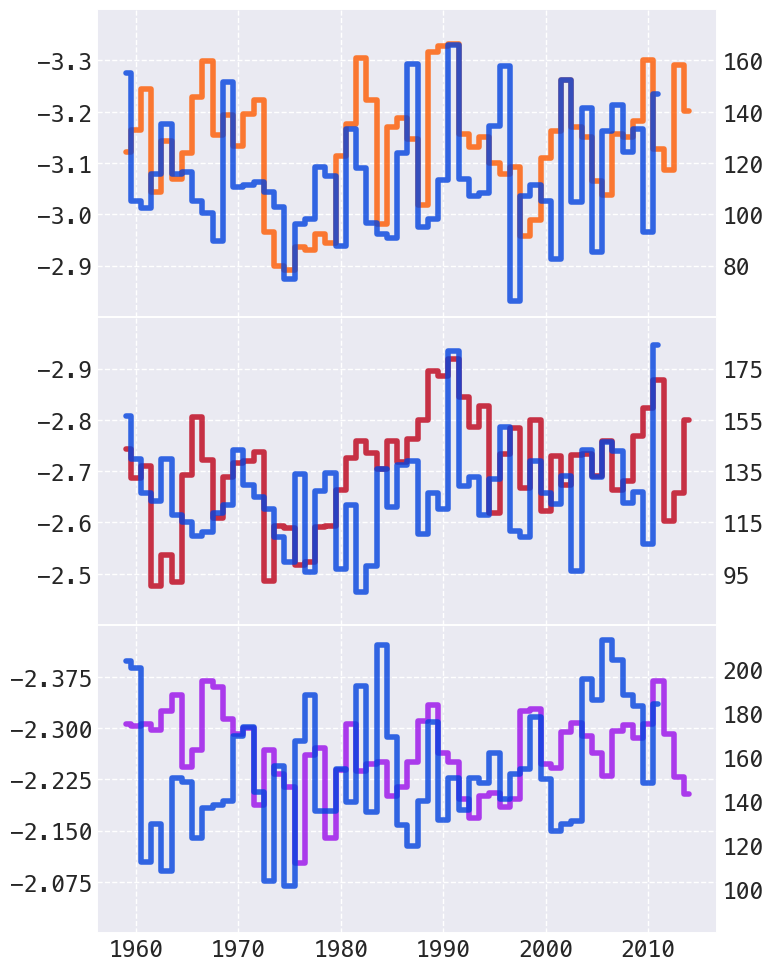

feat NOT subset; don't know how to subset; dropped
meta NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


In [ ]:
O1_anoms = d18O1.resample(time='1Y').mean() #- np.mean(d18O1))/np.std(d18O1.resample(time='1Y').mean())
O2_anoms = d18O2.resample(time='1Y').mean() #- np.mean(d18O2))/np.std(d18O2.resample(time='1Y').mean())
O3_anoms = d18O3.resample(time='1Y').mean() #- np.mean(d18O3))/np.std(d18O3.resample(time='1Y').mean())

P1_anoms = P1.resample(time='1Y').mean() #- np.mean(P1))/np.std(P1.resample(time='1Y').mean())
P2_anoms = P2.resample(time='1Y').mean() #- np.mean(P2))/np.std(P2.resample(time='1Y').mean())
P3_anoms = P3.resample(time='1Y').mean() #- np.mean(P3))/np.std(P3.resample(time='1Y').mean())

smooth = 1

sns.set(style='darkgrid',palette='muted',font='Menlo',font_scale=1.5)
[fig,(ax1,ax2,ax3)] = plt.subplots(3,1,figsize=(8,12))

axa1 = ax1.twinx()

ax1.plot(O1_anoms.time,O1_anoms.rolling(time=smooth,center=True).mean(),color='xkcd:bright orange',linewidth=4,alpha=0.8,drawstyle='steps-mid')
axa1.plot(P1_anoms.time,P1_anoms.rolling(time=smooth,center=True).mean(),color='xkcd:blue',linewidth=4,alpha=0.8,drawstyle='steps-mid')

axa1.grid(False)
ax1.tick_params(axis=u'both', which=u'both',length=0)
axa1.tick_params(axis=u'both', which=u'both',length=0)
ax1.xaxis.set_label_position("top")
ax1.grid(axis='y',linestyle='--')
ax1.grid(axis='x',linestyle='--')
ax1.set_ylim([-3.4,-2.8])
ax1.set_yticks(np.arange(-3.3,-2.8,0.1))
ax1.invert_yaxis()
ax1.tick_params(bottom=False)
axa1.set_ylim([60,180])
axa1.set_yticks(np.arange(80,180,20))

pos1 = ax1.get_position() # get the original position 
pos2 = [pos1.x0,pos1.y0-(pos1.height),pos1.width,pos1.height] 
ax2.set_position(pos2) # set a new position

axa2 = ax2.twinx()

ax2.plot(O1_anoms.time,O2_anoms.rolling(time=smooth,center=True).mean(),color='xkcd:scarlet',linewidth=4,alpha=0.8,drawstyle='steps-mid')
axa2.plot(P2_anoms.time,P2_anoms.rolling(time=smooth,center=True).mean(),linestyle='-',color='xkcd:blue',linewidth=4,alpha=0.8,drawstyle='steps-mid')

axa2.grid(False)
ax2.tick_params(axis=u'both', which=u'both',length=0)
axa2.tick_params(axis=u'both', which=u'both',length=0)
ax2.grid(axis='y',linestyle='--')
ax2.grid(axis='x',linestyle='--')
ax2.set_ylim([-3,-2.4])
ax2.set_yticks(np.arange(-2.9,-2.4,0.1))
ax2.invert_yaxis()
ax2.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False)
axa2.set_ylim([75,195])
axa2.set_yticks(np.arange(95,185,20))
axa2.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False)

pos2 = ax2.get_position() # get the original position 
pos3 = [pos2.x0,pos2.y0-(pos2.height),pos2.width,pos2.height] 
ax3.set_position(pos3) # set a new position

axa3 = ax3.twinx()
axa3.grid(False)
ax3.grid(False)
ax3.plot(O3_anoms.time,O3_anoms.rolling(time=smooth,center=True).mean(),color='xkcd:violet',linewidth=4,alpha=0.8,drawstyle='steps-mid')
axa3.plot(P3_anoms.time,P3_anoms.rolling(time=smooth,center=True).mean(),color='xkcd:blue',linewidth=4,alpha=0.8,drawstyle='steps-mid')

axa3.grid(False)
ax3.tick_params(axis=u'both', which=u'both',length=0)
axa3.tick_params(axis=u'both', which=u'both',length=0)
ax3.grid(axis='y',linestyle='--')
ax3.grid(axis='x',linestyle='--')
ax3.set_ylim([-2.45,-2.00])
ax3.set_yticks(np.arange(-2.375,-2.0,0.075))
ax3.invert_yaxis()
ax3.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=True)
axa3.set_ylim([80,220])
axa3.set_yticks(np.arange(100,210,20))
axa3.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False)

plt.subplots_adjust(hspace=0.001)
plt.show()

# # ---- Save figure ----#
# mpl.rcParams['pdf.fonttype'] = 42
# fig.savefig('Annual-Rainfall-Anomalies-Yearly.pdf')

## Decadal Smooth

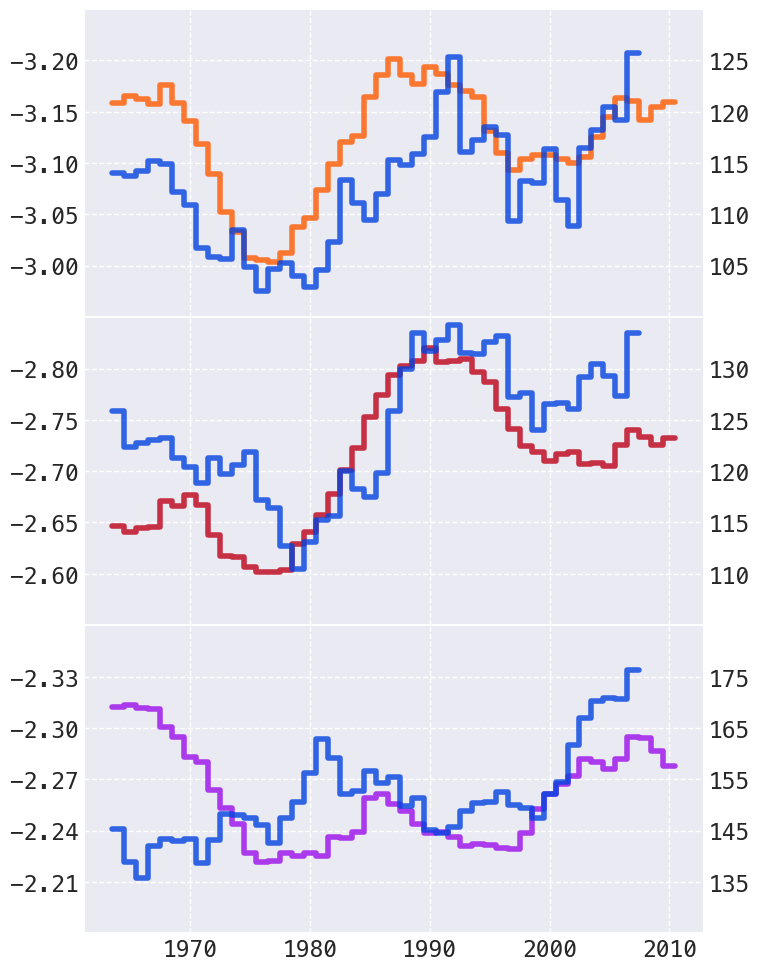

In [21]:
smooth = 10

sns.set(style='darkgrid',palette='muted',font='Menlo',font_scale=1.5)
[fig,(ax1,ax2,ax3)] = plt.subplots(3,1,figsize=(8,12))

axa1 = ax1.twinx()

ax1.plot(O1_anoms.time,O1_anoms.rolling(time=smooth,center=True).mean(),color='xkcd:bright orange',linewidth=4,alpha=0.8,drawstyle='steps-mid')
axa1.plot(P1_anoms.time,P1_anoms.rolling(time=smooth,center=True).mean(),color='xkcd:blue',linewidth=4,alpha=0.8,drawstyle='steps-mid')

axa1.grid(False)
ax1.tick_params(axis=u'both', which=u'both',length=0)
axa1.tick_params(axis=u'both', which=u'both',length=0)
ax1.xaxis.set_label_position("top")
ax1.grid(axis='y',linestyle='--')
ax1.grid(axis='x',linestyle='--')
ax1.set_ylim([-3.25,-2.95])
ax1.set_yticks(np.arange(-3.2,-3,0.05))
ax1.invert_yaxis()
ax1.tick_params(bottom=False)
axa1.set_ylim([100,130])
axa1.set_yticks(np.arange(105,126,5))

pos1 = ax1.get_position() # get the original position 
pos2 = [pos1.x0,pos1.y0-(pos1.height),pos1.width,pos1.height] 
ax2.set_position(pos2) # set a new position

axa2 = ax2.twinx()

ax2.plot(O1_anoms.time,O2_anoms.rolling(time=smooth,center=True).mean(),color='xkcd:scarlet',linewidth=4,alpha=0.8,drawstyle='steps-mid')
axa2.plot(P2_anoms.time,P2_anoms.rolling(time=smooth,center=True).mean(),linestyle='-',color='xkcd:blue',linewidth=4,alpha=0.8,drawstyle='steps-mid')

axa2.grid(False)
ax2.tick_params(axis=u'both', which=u'both',length=0)
axa2.tick_params(axis=u'both', which=u'both',length=0)
ax2.grid(axis='y',linestyle='--')
ax2.grid(axis='x',linestyle='--')
ax2.set_ylim([-2.85,-2.55])
ax2.set_yticks(np.arange(-2.8,-2.55,0.05))
ax2.invert_yaxis()
ax2.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False)
axa2.set_ylim([105,135])
axa2.set_yticks(np.arange(110,135,5))
axa2.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False)

pos2 = ax2.get_position() # get the original position 
pos3 = [pos2.x0,pos2.y0-(pos2.height),pos2.width,pos2.height] 
ax3.set_position(pos3) # set a new position

axa3 = ax3.twinx()
axa3.grid(False)
ax3.grid(False)
ax3.plot(O3_anoms.time,O3_anoms.rolling(time=smooth,center=True).mean(),color='xkcd:violet',linewidth=4,alpha=0.8,drawstyle='steps-mid')
axa3.plot(P3_anoms.time,P3_anoms.rolling(time=smooth,center=True).mean(),color='xkcd:blue',linewidth=4,alpha=0.8,drawstyle='steps-mid')

axa3.grid(False)
ax3.tick_params(axis=u'both', which=u'both',length=0)
axa3.tick_params(axis=u'both', which=u'both',length=0)
ax3.grid(axis='y',linestyle='--')
ax3.grid(axis='x',linestyle='--')
ax3.set_ylim([-2.36,-2.18])
ax3.set_yticks(np.arange(-2.33,-2.18,0.03))
ax3.invert_yaxis()
ax3.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=True)
axa3.set_ylim([125,185])
axa3.set_yticks(np.arange(135,176,10))
axa3.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False)

plt.subplots_adjust(hspace=0.001)
plt.show()

# # ---- Save figure ----#
# mpl.rcParams['pdf.fonttype'] = 42
# fig.savefig('Annual-Rainfall-Anomalies-Decadal.pdf')